In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparing Data

Skenario menghitung CO2 di bawah ini berdasarkan data dimana tidak ada baterai dan tidak ada kontribusi mobil listrik, hanya berasal dari PLN, untuk perbandingan digunakan energi solar sell.

Parameter Supermarket:
1.   Konsumsi energi ketika supermarket buka: 120 kWh/jam
2.   Konsumsi energi ketika supermarket tutup: 24 kWh/jam
3.  Konsumsi energi perhari : 1720 kWh/hari
4.  Rata-rata kebutuhan energi supermarket 0,86 $m^2$ per hari





## Membaca data cuaca

In [ ]:
df1 = pd.read_csv('/content/drive/Shareddrives/PKM_GFT23/weather_data_3.csv')

In [ ]:
df1.head(10)

,Montag,Mon,Dienstag,Tue,Mittwoch,Wed,Donnerstag,Thu,Freitag,Fri,Samstag,Sat,Sonntag,Sun
0,0:00,Malam,0:00,Hujan,0:00,Malam,0:00,Malam,0:00,Malam,0:00,Malam,0:00,Malam
1,0:30,Malam,0:30,Hujan,0:30,Malam,0:30,Malam,0:30,Malam,0:30,Malam,0:30,Malam
2,1:00,Malam,1:00,Hujan,1:00,Malam,1:00,Malam,1:00,Malam,1:00,Malam,1:00,Malam
3,1:30,Malam,1:30,Malam,1:30,Malam,1:30,Malam,1:30,Malam,1:30,Malam,1:30,Berawan
4,2:00,Hujan,2:00,Berawan,2:00,Malam,2:00,Malam,2:00,Malam,2:00,Berawan,2:00,Berawan
5,2:30,Hujan,2:30,Berawan,2:30,Malam,2:30,Malam,2:30,Berawan,2:30,Malam,2:30,Malam
6,3:00,Hujan,3:00,Berawan,3:00,Malam,3:00,Berawan,3:00,Berawan,3:00,Malam,3:00,Berawan
7,3:30,Hujan,3:30,Malam,3:30,Berawan,3:30,Berawan,3:30,Berawan,3:30,Malam,3:30,Malam
8,4:00,Malam,4:00,Malam,4:00,Berawan,4:00,Berawan,4:00,Malam,4:00,Malam,4:00,Malam
9,4:30,Malam,4:30,Malam,4:30,Berawan,4:30,Malam,4:30,Malam,4:30,Malam,4:30,Malam


Setelah mengetahui data real cuaca selanjutnya melakukan perubahan nama

In [ ]:
df_prod=df1.filter(["Montag","Mon","Tue","Wed","Thu", "Fri", "Sat", "Sun"])
df_prod.rename(columns = {'Montag':'Time'}, inplace = True)
df_prod.head()

,Time,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0:00,Malam,Hujan,Malam,Malam,Malam,Malam,Malam
1,0:30,Malam,Hujan,Malam,Malam,Malam,Malam,Malam
2,1:00,Malam,Hujan,Malam,Malam,Malam,Malam,Malam
3,1:30,Malam,Malam,Malam,Malam,Malam,Malam,Berawan
4,2:00,Hujan,Berawan,Malam,Malam,Malam,Berawan,Berawan


Lalu ganti data kategorial menjadi data numerik sesuai data

## Membuat Data yang diproduksi

In [ ]:
cols = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
df_prod[cols] = df_prod[cols].replace({"Malam":0.0, "Hujan":25.0, "Berawan": 40.0, "Cerah":90.0})
                  
print(df_prod)

     Time   Mon   Tue   Wed   Thu   Fri   Sat   Sun
0    0:00   0.0  25.0   0.0   0.0   0.0   0.0   0.0
1    0:30   0.0  25.0   0.0   0.0   0.0   0.0   0.0
2    1:00   0.0  25.0   0.0   0.0   0.0   0.0   0.0
3    1:30   0.0   0.0   0.0   0.0   0.0   0.0  40.0
4    2:00  25.0  40.0   0.0   0.0   0.0  40.0  40.0
5    2:30  25.0  40.0   0.0   0.0  40.0   0.0   0.0
6    3:00  25.0  40.0   0.0  40.0  40.0   0.0  40.0
7    3:30  25.0   0.0  40.0  40.0  40.0   0.0   0.0
8    4:00   0.0   0.0  40.0  40.0   0.0   0.0   0.0
9    4:30   0.0   0.0  40.0   0.0   0.0   0.0   0.0
10   5:00   0.0  40.0   0.0   0.0   0.0   0.0  40.0
11   5:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
12   6:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
13   6:30  40.0  25.0  25.0  90.0  90.0  40.0  25.0
14   7:00  40.0  25.0  25.0  90.0  90.0  40.0  25.0
15   7:30  40.0  25.0  25.0  90.0  90.0  90.0  25.0
16   8:00  40.0  25.0  40.0  90.0  40.0  90.0  40.0
17   8:30  25.0  40.0  25.0  40.0  90.0  90.0  40.0
18   9:00  4

## Membuat Data Energi yang dibutuhkan
Buat dataframe baru yaitu penggunaan energi yang dibutuhkan supermarket ketika buka dari jam 08:00 sampai jam 10:00 malam

In [ ]:
df_cons= pd.DataFrame({"Time": df_prod["Time"]},
                  index=df_prod.index)

In [ ]:
df_cons[cols] = 60 # setengah dari 120 kWh/jam

df_cons["Sun"] = 12 # setengah dari 24 kWh/jam ketika hari libur
boolean_condition = df_cons.index < 16
for i in cols:
    df_cons.loc[boolean_condition, i] = 12.
    
boolean_condition = df_cons.index > 43
for i in cols:
    df_cons.loc[boolean_condition, i] = 12

In [ ]:
print(df_cons)

     Time  Mon  Tue  Wed  Thu  Fri  Sat  Sun
0    0:00   12   12   12   12   12   12   12
1    0:30   12   12   12   12   12   12   12
2    1:00   12   12   12   12   12   12   12
3    1:30   12   12   12   12   12   12   12
4    2:00   12   12   12   12   12   12   12
5    2:30   12   12   12   12   12   12   12
6    3:00   12   12   12   12   12   12   12
7    3:30   12   12   12   12   12   12   12
8    4:00   12   12   12   12   12   12   12
9    4:30   12   12   12   12   12   12   12
10   5:00   12   12   12   12   12   12   12
11   5:30   12   12   12   12   12   12   12
12   6:00   12   12   12   12   12   12   12
13   6:30   12   12   12   12   12   12   12
14   7:00   12   12   12   12   12   12   12
15   7:30   12   12   12   12   12   12   12
16   8:00   60   60   60   60   60   60   12
17   8:30   60   60   60   60   60   60   12
18   9:00   60   60   60   60   60   60   12
19   9:30   60   60   60   60   60   60   12
20  10:00   60   60   60   60   60   60   12
21  10:30 

## Menampilkan grafik energi yang dibutuhkan vs energi yang di produksi

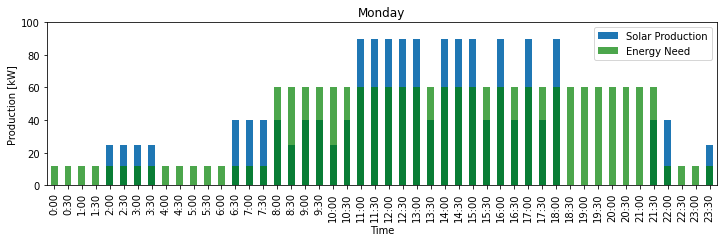

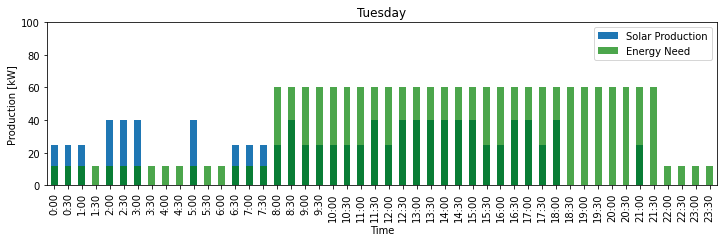

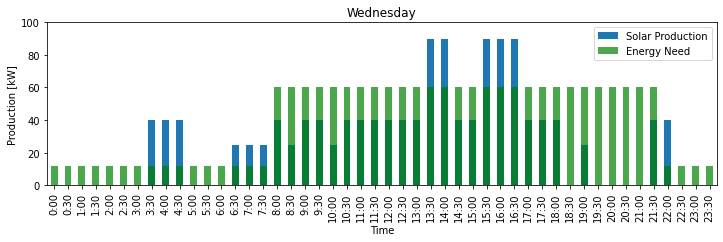

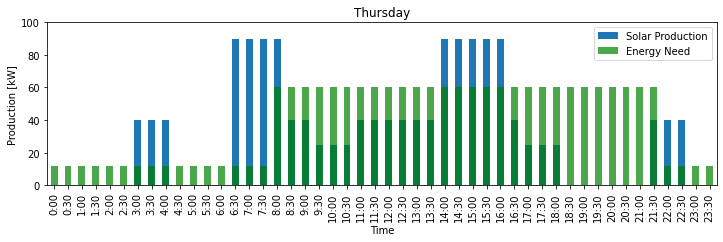

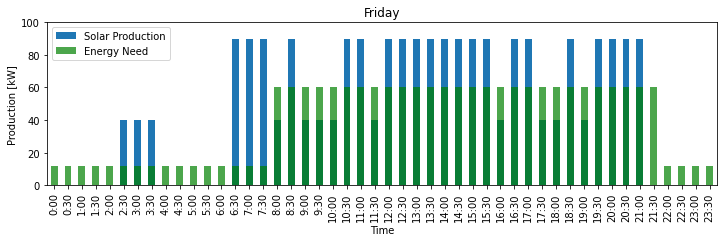

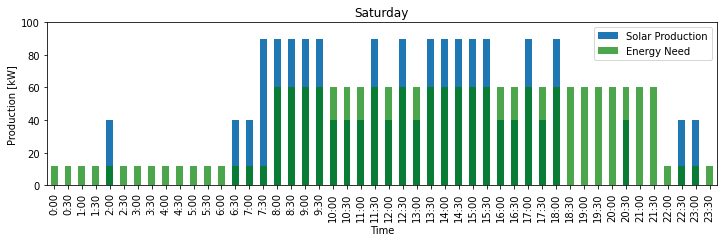

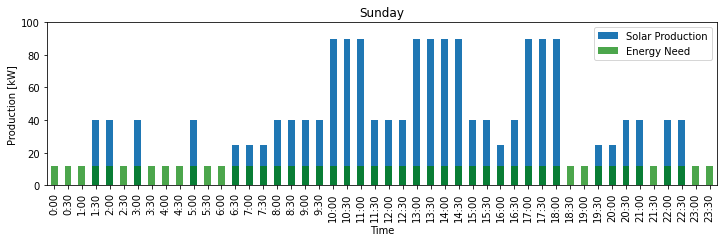

In [ ]:
week_days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
full_names=res = dict(zip(cols, week_days))

for i in cols:
    ax=df_prod.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Solar Production")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Production [kW]")
    ax.set_ylim([0,100])
    ax.set_title(full_names[i])
    df_cons.plot(ax=ax , x="Time", y=i, kind="bar", color="green", alpha=0.7, figsize=(12, 3), label="Energy Need")
plt.show()

Berdasarkan Grafik di atas bagaimana menurut analisa anda untuk kebutuhan energi per setengah jam dengan energi yang di produksi? Jelaskan di Pemicu gagasan

## Menghitung jumlah CO2 yang dihasilkan


digunakan rumus sebagai berikut:
Jumlah $CO_2$ = $c_{plug}*E_{plug} = c_{plug}*max(E_{need}-E_{solar},0)$

In [ ]:
#lakukan transpose matrix 8x48
a_cons=df_cons.iloc[:,1:].values.T

a_prod=df_prod.iloc[:,1:].values.T

#lakukan perhitungan E_need - E_solar
a_plug=a_cons - a_prod

#copy array
a_imb=a_plug.copy()

#jika nilai array dibawah nol maka sama dengan nol
a_plug[a_plug <0]=0

#masukkan ke rumus lalu kalikan dengan nilai c_plug atau besar CO2 dari sumber PLN
#c_plug=420 g/kWh

a_co2=a_plug*420.

df_CO2= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)

for i in range(len(cols)):
    df_CO2[cols[i]]=a_co2[i]

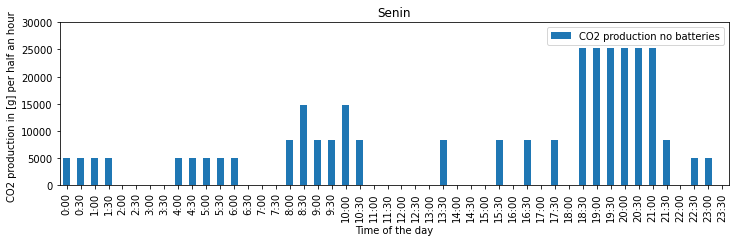

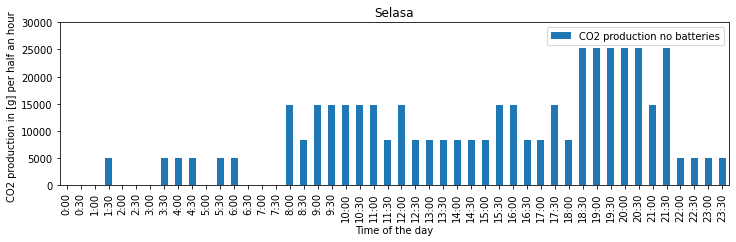

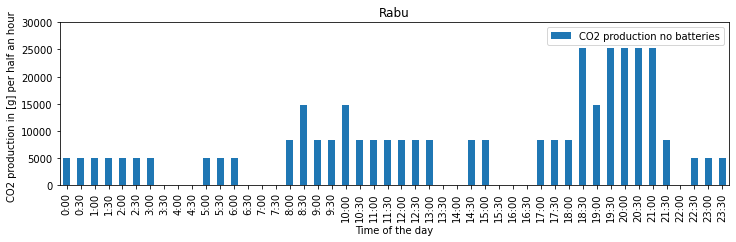

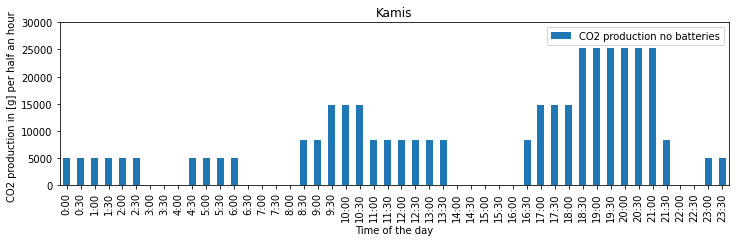

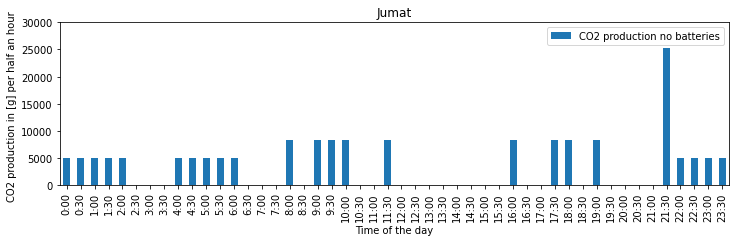

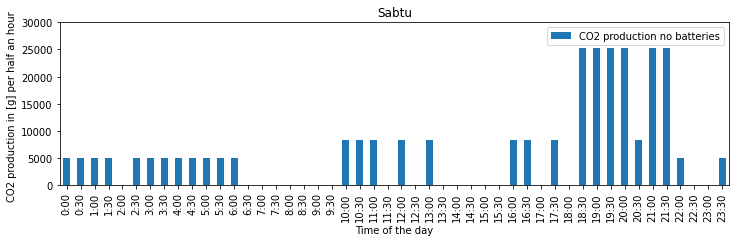

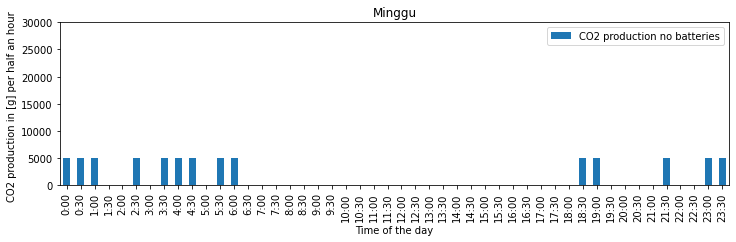

In [ ]:
for i in cols:
    ax=df_CO2.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="CO2 production no batteries")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("CO2 production in [g] per half an hour ")
    ax.set_title(full_names[i])
    ax.set_ylim([0,30000])
   
plt.show()

Grafik di atas adalah grafik produksi $CO_2$ g/kWh setiap setengah jam sekali pada supermarket. Jelaskan di pemicu gagasan

## Membaca Data Mobil Listrik yang datang dan keluar dari supermarket

Spesifikasi data:
Car = jumlah mobil yang datang Mo1 itu berarti 1, sampai mo127 berarti ada 127 mobil pada hari senin
Day = hari
Arrival = pukul tiba di supermarket
PbatteryA = Status baterai di supermarket (mobil mengisi daya berarti depature time nya 30 menit)
Depature = pukul pergi dari supermarket
PbatteryD = Sisa status setelah depature time 


In [ ]:
dfc=pd.read_csv("/content/drive/Shareddrives/PKM_GFT23/car_data.csv")
dfc.head()

,Car,Day,Arrival,PbatterA,Depature,PbatteryD
0,Mo1,Monday,8:00,92.0,8:00,53.0
1,Mo2,Monday,8:00,73.0,8:30,42.0
2,Mo3,Monday,8:00,73.0,9:00,67.0
3,Mo4,Monday,8:00,85.0,8:00,14.0
4,Mo5,Monday,8:00,86.0,8:00,76.0


In [ ]:
short_days=["Mon","Tue", "Wed","Thu","Fri","Sat"]

dict_cars={}
for i in range(len(week_days)-1):
    dict_cars[short_days[i]]= pd.DataFrame()
    dict_cars[short_days[i]]=dfc.loc[dfc['Day'] == week_days[i]]

Parameter di supermarket = Energy batery spaces = 500 kWh
kecepatan mengisi daya dan melepas daya (penggunaan baterai untuk supermarket) = 120 kWh
capacity battery dari mobil listrik = 60 kWh
kecepatan mengisi daya = 120 kWh 

In [ ]:
mall_battery_cap=500
mall_battery_rate=120
ev_battery_cap=60
ev_battery_rate=120

week_days=["Senin", "selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
full_names=res = dict(zip(cols, week_days))

In [ ]:
print(dict_cars['Mon'])

       Car     Day Arrival   PbatterA Depature  PbatteryD
0      Mo1  Monday     8:00      92.0     8:00       53.0
1      Mo2  Monday     8:00      73.0     8:30       42.0
2      Mo3  Monday     8:00      73.0     9:00       67.0
3      Mo4  Monday     8:00      85.0     8:00       14.0
4      Mo5  Monday     8:00      86.0     8:00       76.0
..     ...     ...      ...       ...      ...        ...
122  Mo123  Monday    20:30      84.0    21:30       57.0
123  Mo124  Monday    21:00      53.0    21:30       13.0
124  Mo125  Monday    21:00      92.0    21:00       78.0
125  Mo126  Monday    21:30      84.0    21:30        9.0
126  Mo127  Monday    21:30      82.0    21:30       10.0

[127 rows x 6 columns]


Kemungkinan Banyaknya mobil yang akan parkir di supermarket berdasarkan data simulasi

In [ ]:
df_car_histo= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
df_car_histo[cols] = 0


a_histo=df_car_histo.iloc[:,1:].values.T
a_histo_pri=np.zeros_like(a_histo)


ArrData={}
PbatterA={}
DepData={}
PbatterD={}
for i in range(len(week_days)-1):
    ArrData[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 2 ].values
    PbatterA[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 3 ].values
    DepData[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 4 ].values
    PbatterD[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 5].values
    
    for k in range(ArrData[short_days[i]].shape[0]):
        start_index=df_prod.index[df_prod['Time'] == ArrData[short_days[i]][k] ].tolist()[0]
        end_index=df_prod.index[df_prod['Time'] == DepData[short_days[i]][k] ].tolist()[0]
        
        # print("%s %d"%( ArrData[short_days[i]][k] ,start_index))
        # print("%s %d"%(DepData[short_days[i]][k] ,end_index))
        #the index here runs up to end_index+1 as departure
        #time is intended at the end of the slot!
        for j in range(start_index,end_index+1):
             a_histo[i, j] = a_histo[i, j]+1
        a_histo_pri[i, end_index]=a_histo_pri[i, end_index]+1

for i in range(len(cols)):
    df_car_histo[cols[i]]=a_histo[i]

    
for i in range(len(cols)):
    df_car_histo["pridep"+cols[i]]=a_histo_pri[i]    
#print(df_car_histo)

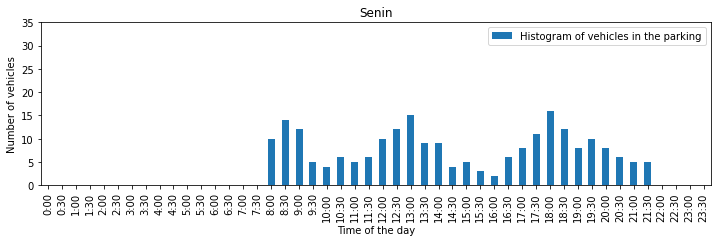

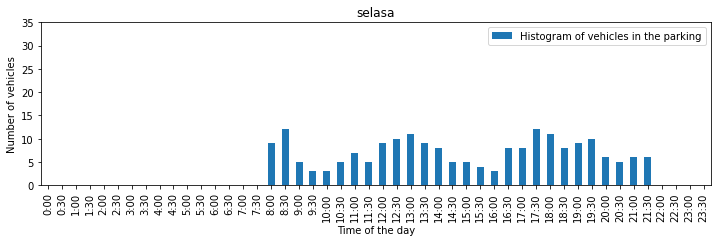

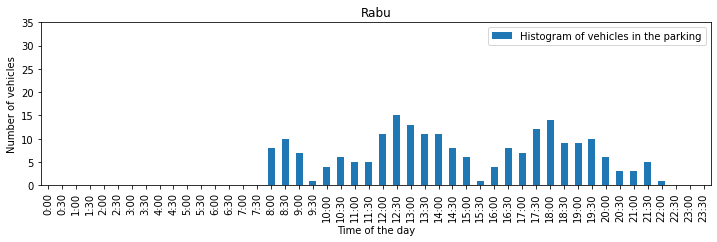

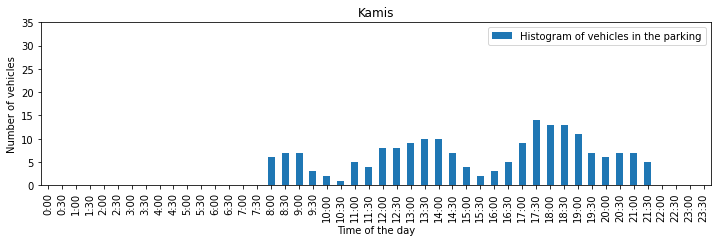

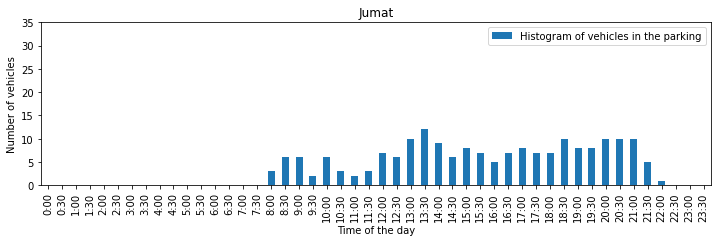

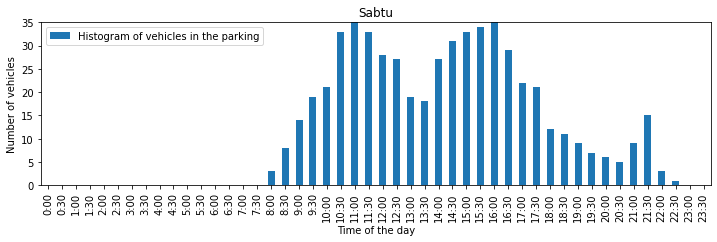

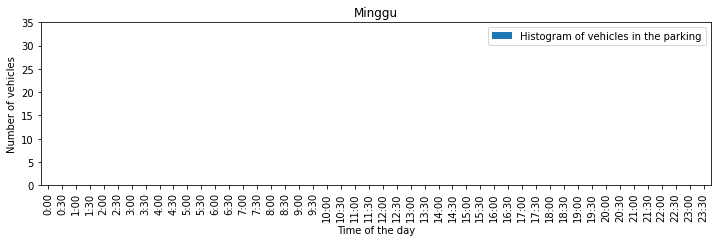

In [ ]:
for i in cols:
    ax=df_car_histo.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Histogram of vehicles in the parking")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Number of vehicles")
    ax.set_ylim([0,35])
    ax.set_title(full_names[i])
plt.show()

Grafik mobil listrik yang akan mengisi daya

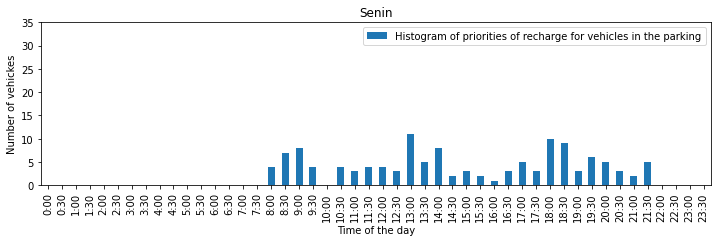

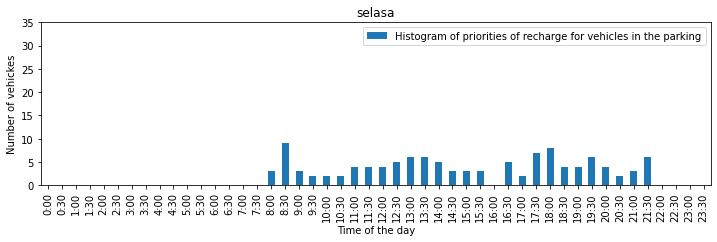

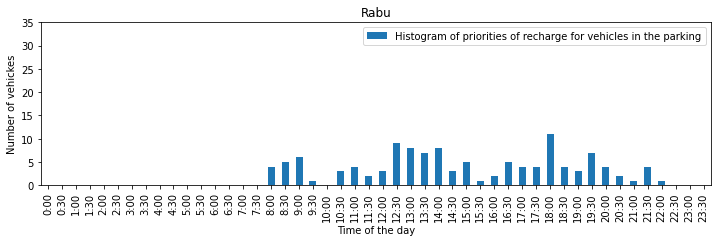

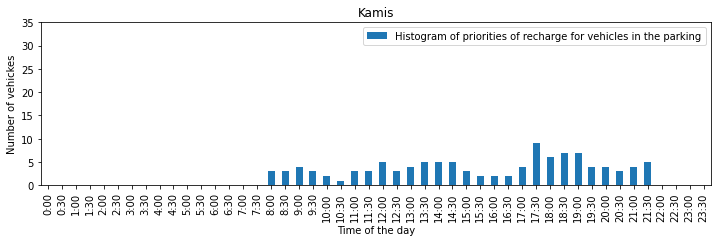

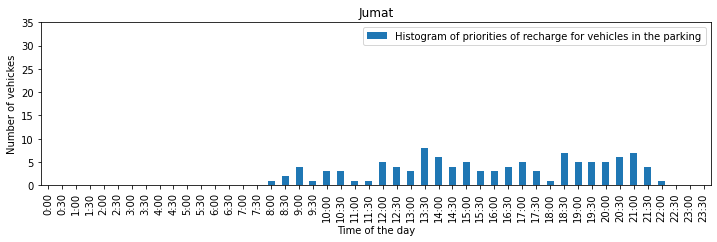

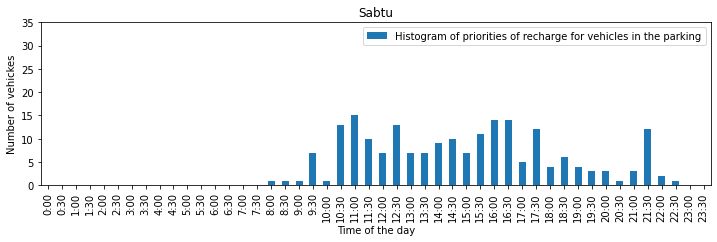

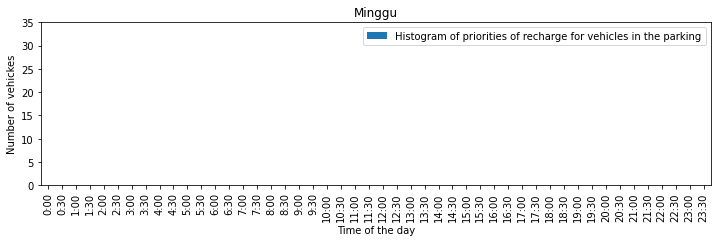

In [ ]:
for i in cols:
    j="pridep"+i
    ax=df_car_histo.plot(x="Time", y=j, kind="bar", figsize=(12, 3), label="Histogram of priorities of recharge for vehicles in the parking")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Number of vehickes")
    ax.set_ylim([0,35])
    ax.set_title(full_names[i])
plt.show()

## Lihat Math Description bagian 4

In [ ]:
c_plug=420
c_bd=84
c_br=-84

a_plug=1
a_bd=2
a_br=1.3


aa_pp=a_plug*a_plug
aa_pbd=a_plug*a_bd
aa_pbr=a_plug*a_br
a_pb=a_plug*a_bd

# Optimisasi dengan Quantum Computing Dwave

In [ ]:
pip install dwave_networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 41.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
pip install minorminer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 KB 18.1 MB/s eta 0:00:00


In [ ]:
pip install dwave-system

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.4/111.4 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 5.4 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import dwave_networkx as dnx
import minorminer
import dimod
from dimod.binary_quadratic_model import BinaryQuadraticModel
from dwave.system.composites import EmbeddingComposite
from dwave.system import DWaveSampler
#from braket.aws import AwsDevice
#from braket.ocean_plugin import BraketSampler, BraketDWaveSampler

# part still in construction
n_bat_mall=1
E_bat_mall=500
r_bat_mall=120
n_qub_mb=n_bat_mall*3


C_bat_status=np.zeros_like(a_imb)


C_bat_status[0,0]=440

n_days=7
n_times=48

#we have 3 qubits for each battery, 1 for discharging 
#1 for charging and 1 for the slack variable

sigma_slack=np.full((3,3),2)
for i in range(3):
    sigma_slack[i,i]=0.
mu_slack=np.full((3),-1)

n_times=48
n_days = 7
a_CO2_prod_conv=np.zeros((n_days,n_times))

r_bat_v=120
dt=0.5 # fraction of an hour
C_bat_mall=0
for d in range (n_days):
    for t in range(n_times):  
        #N_v=a_histo[d,t]
        N_v=0
        if d==0 and t==0:
            C_bat_mall=440
        elif t==0:
            C_bat_mall=C_bat_status[d-1,n_times-1] 
        else:
            C_bat_mall=C_bat_status[d,t-1]
        N_v=0
        n_qub_v=N_v*3
        n_qub_tot=n_qub_mb+n_qub_v
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        
        for i in range(n_bat_mall):
            sigma_p[3*i,3*i+1]=(r_bat_mall**2)*aa_pp*dt*dt
            
        
        E_imb=a_imb[d,t]
        mu_p=np.zeros((n_qub_tot))
       
        r_bat_mdisc=r_bat_mall*dt 
        if C_bat_mall==0 :
            r_bat_mdisc=10000
        elif (N_v ==0): 
            r_bat_mdisc=min(E_imb, r_bat_mall*dt)
        r_bat_mcharge=r_bat_mall*dt    
        if C_bat_mall==500 :
            r_bat_mcharge=10000
        
        for k in range(n_bat_mall):
            for i in range(2*N_v):
                sigma_p[k,3+i]=+aa_pbd*(r_bat_disc*r_bat_v)*dt
                sigma_p[k+1,3+i]=-a_pbr*(r_bat_charge*r_bat_v)*dt
            mu_p[3*k]=( - 2*aa_pp*E_imb*r_bat_mdisc)    
            mu_p[3*k+1]=+(2*aa_pp*E_imb*r_bat_mcharge)
            mu_p[3*k+2]=0.
           
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
        fac_bound=1
        
        
        sigma=sigma_slack+sigma_p
        mu=np.true_divide(mu_p, fac_bound)+mu_slack
        
        
        # run classical simulated annealing
        model = dimod.BinaryQuadraticModel(vartype="BINARY")
        model.add_linear_from_array(mu)
        model.add_quadratic_from_dense(sigma)
        
        print(model.quadratic)
        print(model.linear)
        #print(mu)
        #print(sigma)
        #model.add_linear_equality_constraint([(0, 1), (1, 1), (2, 1) ], 100000, -1)
        #model.add_linear_equality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000, -E_imb)
        if E_imb>0:
            model.add_linear_equality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000, -E_imb)
        else:
            model.add_linear_inequality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000,label="eq2", ub=-E_imb)
        
        sampler = dimod.SimulatedAnnealingSampler()
        
        results = sampler.sample(model)
        


        
        best_solution = results.first.sample
        print("Best solution")
        print(best_solution)
        energy=results.first.energy
        

        
        c_stars=np.zeros((n_qub_tot))
        for k,v in best_solution.items():
            if (isinstance(k, int)):
                c_stars[int(k)]=v
       
        # response aggregate
        #response_aggregate = response.aggregate()
        #print(response_aggregate)
        if (c_stars[0]==1 and c_stars[1]==1):
            c_stars[0]=0
            c_stars[1]=0
        
        
        C_bat_status[d,t]=C_bat_mall-r_bat_mdisc*c_stars[0]+r_bat_mcharge*c_stars[1]
        if C_bat_status[d,t] > 500: 
            C_bat_status[d,t] = 500
        if C_bat_status[d,t] < 0: 
            C_bat_status[d,t] = 0
        #print(C_bat_status[d,t])
        E_plug=E_imb+(C_bat_status[d,t]-C_bat_mall)
        print(E_plug)
        
        a_CO2_prod_conv[d,t]=420.0*max(E_plug,0)

print(C_bat_status[n_days-1,n_times-1])
        # print results

{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -339.0, 1: -1561.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
47.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -339.0, 1: -1561.0, 2: -1.0}


/usr/local/lib/python3.8/dist-packages/dimod/binary/binary_quadratic_model.py:764: UserWarning: Did not add constraint eq2. This constraint is feasible with any value for state variables.
  warnings.warn(


Best solution
{0: 0, 1: 1, 2: 0}
35.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -339.0, 1: -260001.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
-13.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -339.0, 1: -260001.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
-13.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 239999.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1569.0, 1: -3361.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
32.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -156

In [ ]:
df_mall_battery_conv= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
for i in range(len(cols)):
    df_mall_battery_conv[cols[i]] = C_bat_status[i]

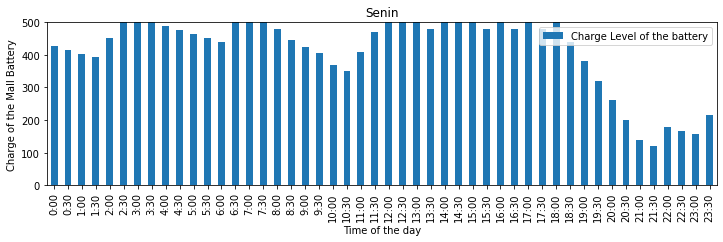

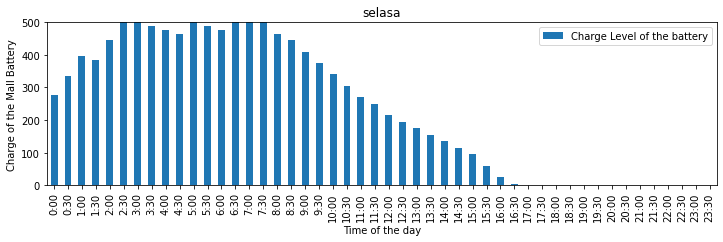

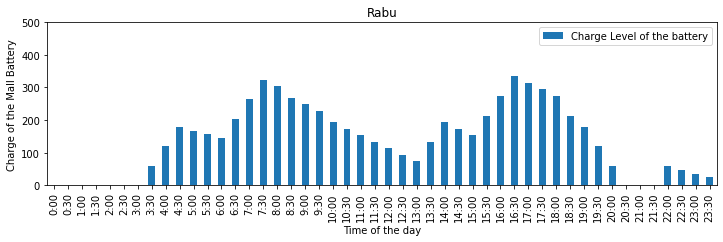

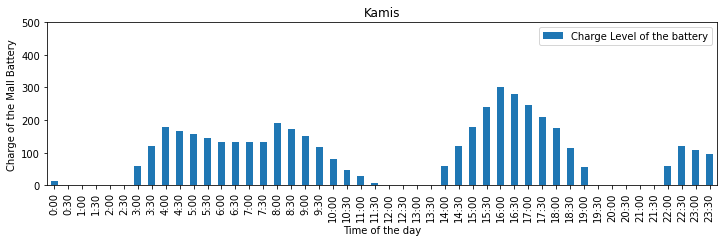

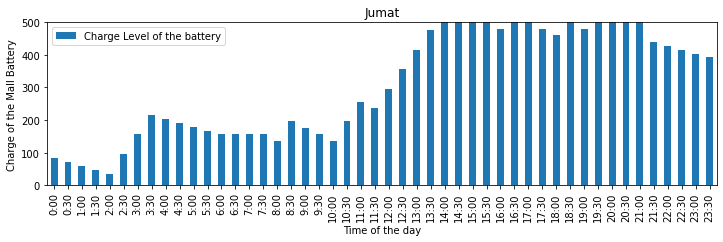

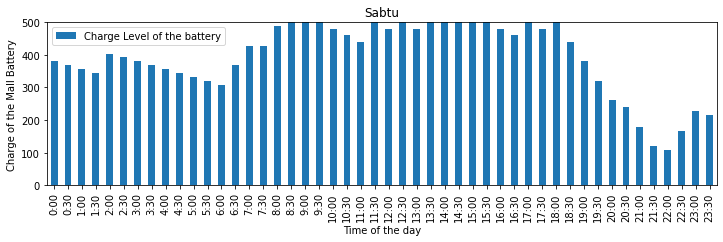

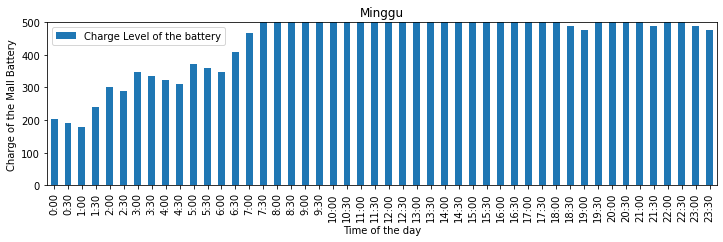

In [ ]:
for i in cols:
    ax=df_mall_battery_conv.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Charge Level of the battery")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Charge of the Mall Battery")
    ax.set_ylim([0,500])
    ax.set_title(full_names[i])
plt.show()

In [ ]:
for i in range(len(cols)):
    df_CO2["conv"+cols[i]] = a_CO2_prod_conv[i]

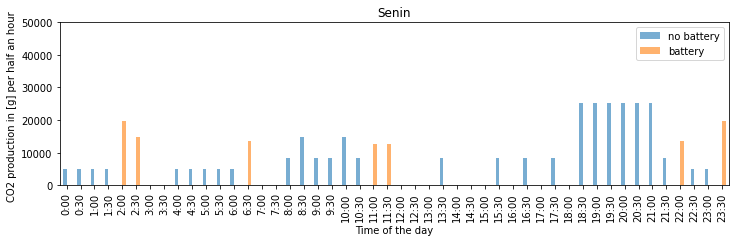

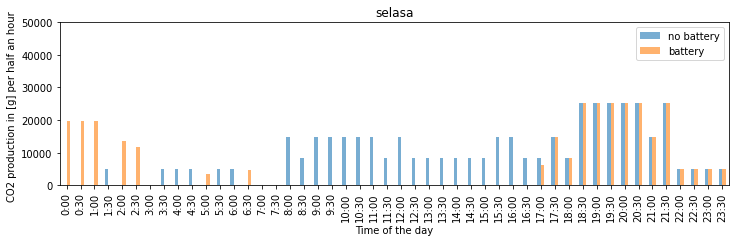

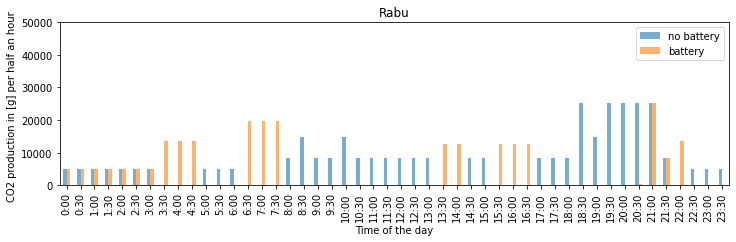

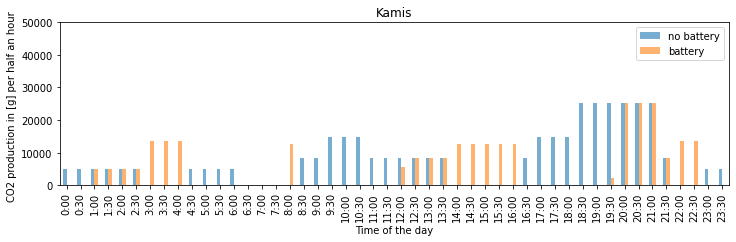

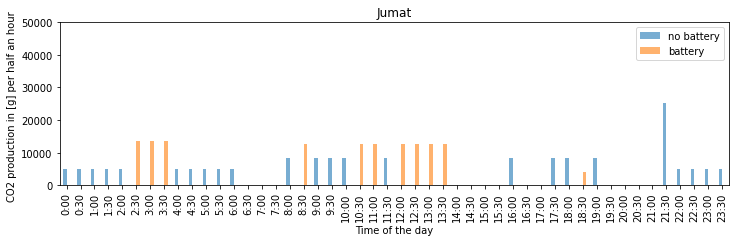

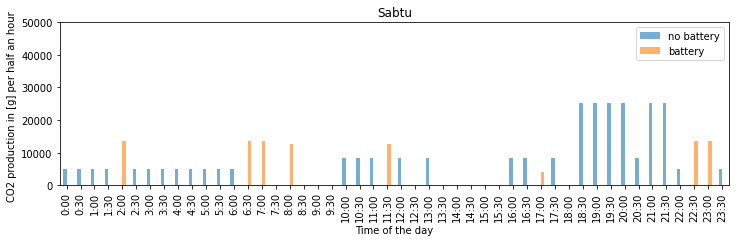

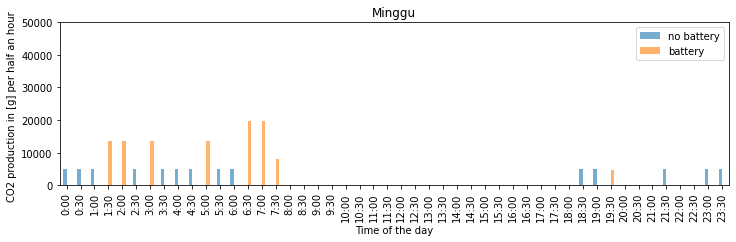

In [ ]:
for i in cols:
    j="conv"+i
    ax=df_CO2.plot(x="Time", y=[i, j], kind="bar", figsize=(12, 3), label=["no battery", "battery"],  alpha=0.6)
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("CO2 production in [g] per half an hour ")
    ax.set_title(full_names[i])
    ax.set_ylim([0,50000])

plt.show()

In [ ]:

## for dwave the sign convention is opposite with respect to qaoa
## if we add the quadratic terms as full matrix we do not have to double the off diagonal terms

from dwave.system import DWaveSampler
n_times=48
n_days = 7
n_bat_mall=1
r_bat_mall=120
r_bat_v=120
dt=0.5 # fraction of an hour

C_bat_status=np.zeros((n_days, n_times))
a_CO2_prod_dwave=np.zeros((n_days, n_times))

#for d in range (n_days):
 #   for t in range(n_times):
n_qub_mb=3*n_bat_mall

for d in range (n_days):
#for d in range (1):
    for t in range(n_times):  
        if d==0 and t==0:
            C_bat_mall=440
        elif t==0:
            C_bat_mall=C_bat_status[d-1,n_times-1] 
        else:
            C_bat_mall=C_bat_status[d,t-1]
        N_v=0
        n_qub_v=N_v*3
        n_qub_tot=n_qub_mb+n_qub_v
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        
        for i in range(n_bat_mall):
            sigma_p[3*i,3*i+1]=(r_bat_mall**2)*aa_pp*dt*dt
            
        
        E_imb=a_imb[d,t]
        mu_p=np.zeros((n_qub_tot))
       
        r_bat_mdisc=r_bat_mall*dt 
        if C_bat_mall==0 :
            r_bat_mdisc=10000
        elif (N_v ==0): 
            r_bat_mdisc=min(E_imb, r_bat_mall*dt)
        r_bat_mcharge=r_bat_mall*dt    
        if C_bat_mall==500 :
            r_bat_mcharge=10000
        
        for k in range(n_bat_mall):
            for i in range(N_v):
                sigma_p[3*k,3*n_bat_mall+3*i]=+aa_pbd*(r_bat_disc*r_bat_v)*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i]=-aa_pbr*(r_bat_charge*r_bat_v)*dt
                sigma_p[3*k,3*n_bat_mall+3*i+1]=-aa_pbd*(r_bat_disc*r_bat_v)*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i+1]=aa_pbr*(r_bat_charge*r_bat_v)*dt
            mu_p[3*k]=( - 2*aa_pp*E_imb*r_bat_mdisc)    
            mu_p[3*k+1]=+(2*aa_pp*E_imb*r_bat_mcharge)
            mu_p[3*k+2]=0.
           

        
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
        fac_bound=10
        
        
        sigma=+fac_bound*sigma_slack+sigma_p
        mu=np.true_divide(mu_p, fac_bound)+mu_slack
        #mu=mu_p+fac_bound*mu_slack
        
        # run classical simulated annealing
        model = dimod.BinaryQuadraticModel(vartype="BINARY")
        model.add_linear_from_array(mu)
        model.add_quadratic_from_dense(sigma)
        
        print(model.quadratic)
        print(model.linear)
       
        if E_imb>0:
            model.add_linear_equality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000, -E_imb)
        else:
            model.add_linear_inequality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000,label="eq2", ub=-E_imb)
        
        s3_folder = ("dummy_variable", "dummy_variable")
        #sampler = BraketDWaveSampler(s3_folder,device_arn='arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6')
        #sampler = EmbeddingComposite(sampler)
        #sampleset = sampler.sample(model, num_reads=100)
        
        sampler=DWaveSampler(solver={'topology__type': 'pegasus'})
        sampler =EmbeddingComposite(sampler)
        results = sampler.sample(model, label='Example')

        
        print(results)
        

        # response aggregate
        # run classical simulated annealing
        best_solution = results.first.sample
        print("Best solution")
        print(best_solution)
        energy=results.first.energy
        

        
        c_stars=np.zeros((n_qub_tot))
        for k,v in best_solution.items():
            if (isinstance(k, int)):
                c_stars[int(k)]=v
       
        # response aggregate
        #response_aggregate = response.aggregate()
        #print(response_aggregate)
        if (c_stars[0]==1 and c_stars[1]==1):
            c_stars[0]=0
            c_stars[1]=0
        
        
        C_bat_status[d,t]=C_bat_mall-r_bat_mdisc*c_stars[0]+r_bat_mcharge*c_stars[1]
        if C_bat_status[d,t] > 500: 
            C_bat_status[d,t] = 500
        if C_bat_status[d,t] < 0: 
            C_bat_status[d,t] = 0
        #print(C_bat_status[d,t])
        E_plug=E_imb+(C_bat_status[d,t]-C_bat_mall)
        print(E_plug)
        
        a_CO2_prod_dwave[d,t]=420.0*max(E_plug,0)
        
        
                                             

        
        
        
        

print(C_bat_status[n_days-1,n_times-1])

{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}


ValueError: ignored